<a href="https://colab.research.google.com/github/vale314/machine-learning-course-CUCEI-00/blob/main/Challenge06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Graficos embebidos.
%matplotlib inline

In [31]:
import numpy as np #importando numpy
from scipy import stats # importando scipy.stats
import matplotlib.pyplot as plt # importando matplotlib
import seaborn as sns # importando seaborn
import seaborn as sb


# parámetros estéticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [4]:
# Trabajando con una ruta relativa
path = './drive/MyDrive/CUCEI/ML-COURSE-JUAN/Students/' 

# Colocamos en una variable el archivo a trabajar
archivo = 'StudentsPerformance1.csv'

In [5]:
# Paquete requerido para listar los archivos del directorio
from os import listdir

In [6]:
import pandas as pd

In [7]:
Files = []
for File in listdir(path):
    # Escribir la RUTA COMPLETA de cada archivo
    Files.append(File)

In [8]:
# Mostramos los archivos del directorio que hemos decidido trabajar
Files

['StudentsPerformance.csv',
 'StudentsPerformance.gsheet',
 'StudentsPerformance1.csv']

In [9]:
df = pd.read_csv(path+archivo, index_col=0)

In [10]:
df.shape

(1000, 8)

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
NaN,female,group B,bachelor's degree,standard,none,72,72,74
NaN,female,group C,some college,standard,completed,69,90,88
NaN,female,group B,master's degree,standard,none,90,95,93
NaN,male,group A,associate's degree,free/reduced,none,47,57,44
NaN,male,group C,some college,standard,none,76,78,75


---
#### Solo correr para comprobar archivos


###Discretizar

In [16]:
dfC = pd.DataFrame()


In [17]:
dfC['race/ethnicity'] = df['race/ethnicity']
dfC['parental level of education'] = df['parental level of education']
dfC['lunch'] = df['lunch']
dfC['test preparation course'] = df['test preparation course']
dfC['gender'] = df['gender']

In [19]:
dfC['math score'] = pd.qcut(df['math score'], q=4)
dfC['reading score'] = pd.qcut(df['reading score'], q=4)
dfC['writing score'] = pd.qcut(df['writing score'], q=4)

dfC.head()

,race/ethnicity,parental level of education,lunch,test preparation course,gender,math score,reading score,writing score
NaN,group B,bachelor's degree,standard,none,female,"(66.0, 77.0]","(70.0, 79.0]","(69.0, 79.0]"
NaN,group C,some college,standard,completed,female,"(66.0, 77.0]","(79.0, 100.0]","(79.0, 100.0]"
NaN,group B,master's degree,standard,none,female,"(77.0, 100.0]","(79.0, 100.0]","(79.0, 100.0]"
NaN,group A,associate's degree,free/reduced,none,male,"(-0.001, 57.0]","(16.999, 59.0]","(9.999, 57.75]"
NaN,group C,some college,standard,none,male,"(66.0, 77.0]","(70.0, 79.0]","(69.0, 79.0]"


In [20]:
dfG = df.copy()

In [28]:
dfG.columns

Index(['race/ethnicity_group A', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E', 'gender_female', 'gender_male',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none', 'math score', 'reading score',
       'writing score'],
      dtype='object')

###Generalizar

In [44]:
dfG = pd.get_dummies(dfC, columns=["race/ethnicity"])
dfG = pd.get_dummies(dfG, columns=["gender"])
dfG = pd.get_dummies(dfG, columns=["parental level of education"])
dfG = pd.get_dummies(dfG, columns=["lunch"])
dfG = pd.get_dummies(dfG, columns=["test preparation course"])
dfG = dfG.drop('math score', axis = 1)
dfG = dfG.drop('reading score', axis = 1)
dfG = dfG.drop('writing score', axis = 1)

In [45]:

dfG['math score'] = df['math score']
dfG['reading score'] = df['reading score']
dfG['writing score'] = df['writing score']

In [46]:
dfG.head()


,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,math score,reading score,writing score
NaN,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,72,72,74
NaN,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,69,90,88
NaN,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,90,95,93
NaN,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,47,57,44
NaN,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,76,78,75


###Correlacion

In [47]:
pearsoncorr = dfG.corr(method='pearson')
pearsoncorr

,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,math score,reading score,writing score
race/ethnicity_group A,1.000000,-0.151381,-0.213923,-0.186234,-0.126110,-0.071001,0.071001,-0.048658,0.016307,0.004919,-0.033551,-0.017751,0.073921,0.032329,-0.032329,-0.006315,0.006315,-0.091977,-0.096274,-0.110714
race/ethnicity_group B,-0.151381,1.000000,-0.331479,-0.288574,-0.195411,0.028466,-0.028466,-0.007238,-0.019121,0.069093,-0.056363,-0.036203,0.026531,0.008257,-0.008257,-0.000106,0.000106,-0.084250,-0.060283,-0.078254
race/ethnicity_group C,-0.213923,-0.331479,1.000000,-0.407797,-0.276145,0.063368,-0.063368,0.037077,0.015682,0.007977,0.001630,-0.015872,-0.045339,0.003385,-0.003385,0.012522,-0.012522,-0.073387,-0.003074,-0.010203
race/ethnicity_group D,-0.186234,-0.288574,-0.407797,1.000000,-0.240402,-0.030566,0.030566,-0.044674,-0.020556,-0.042118,0.072793,0.042347,0.018402,0.009458,-0.009458,-0.055956,0.055956,0.050071,0.035177,0.082032
race/ethnicity_group E,-0.126110,-0.195411,-0.276145,-0.240402,1.000000,-0.020302,0.020302,0.054922,0.013221,-0.039494,-0.003180,0.023153,-0.053075,-0.052398,0.052398,0.059393,-0.059393,0.205855,0.106712,0.089077
gender_female,-0.071001,0.028466,0.063368,-0.030566,-0.020302,1.000000,-1.000000,0.004835,0.011638,-0.037952,0.046188,0.004460,-0.008990,0.021372,-0.021372,-0.006028,0.006028,-0.167982,0.244313,0.301225
gender_male,0.071001,-0.028466,-0.063368,0.030566,0.020302,-1.000000,1.000000,-0.004835,-0.011638,0.037952,-0.046188,-0.004460,0.008990,-0.021372,0.021372,0.006028,-0.006028,0.167982,-0.244313,-0.301225
parental level of education_associate's degree,-0.048658,-0.007238,0.037077,-0.044674,0.054922,0.004835,-0.004835,1.000000,-0.195386,-0.263746,-0.133757,-0.288649,-0.249426,-0.009102,0.009102,0.012668,-0.012668,0.063228,0.064386,0.064799
parental level of education_bachelor's degree,0.016307,-0.019121,0.015682,-0.020556,0.013221,0.011638,-0.011638,-0.195386,1.000000,-0.180595,-0.091588,-0.197647,-0.170790,0.013668,-0.013668,0.024285,-0.024285,0.079664,0.096024,0.128297
parental level of education_high school,0.004919,0.069093,0.007977,-0.042118,-0.039494,-0.037952,0.037952,-0.263746,-0.180595,1.000000,-0.123632,-0.266799,-0.230545,0.002211,-0.002211,-0.074446,0.074446,-0.128725,-0.151068,-0.182211


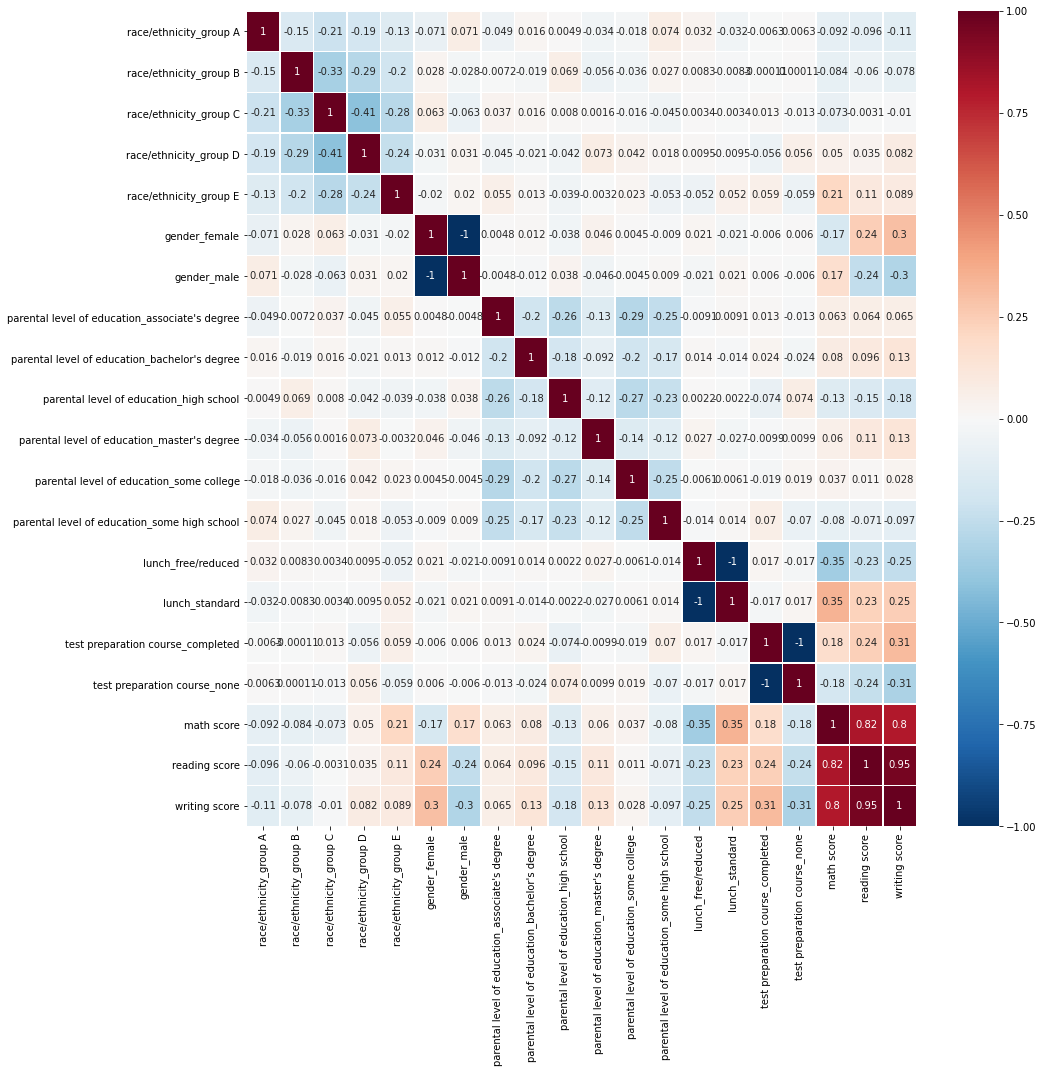

In [42]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidths=.5,
            ax=ax
            )

###Correlacion De Pearson en los datos numericos

In [12]:
pearsoncorr = df.corr(method='pearson')
pearsoncorr

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


###Conclusion Previa

En el texto y documento anterior, podemos ver cuales son las correlaciones totales de todo y las correlaciones numericas unicamente tomando los datos naturales numericos discretos. 

Podemos notar una correlacion mas alta los examenes, al tener una buena nota en una area de estudio afecta directmante la calificacion de otra.

Seguido de los tipos de comida.

#Dividir-Datos

In [48]:
from sklearn.model_selection import train_test_split 

In [58]:
train, test = train_test_split(dfG, test_size = 0.30)

print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  700
Ejemplos usados para test:  300


In [66]:
pearsoncorrtest = test.corr(method='pearson')
pearsoncorrtrain = train.corr(method='pearson')


In [68]:
print(pearsoncorrtrain)
print(pearsoncorrtest)

                                                race/ethnicity_group A  ...  writing score
race/ethnicity_group A                                        1.000000  ...      -0.125281
race/ethnicity_group B                                       -0.160488  ...      -0.071162
race/ethnicity_group C                                       -0.217340  ...      -0.008947
race/ethnicity_group D                                       -0.194276  ...       0.051885
race/ethnicity_group E                                       -0.129704  ...       0.134839
gender_female                                                -0.070979  ...       0.285833
gender_male                                                   0.070979  ...      -0.285833
parental level of education_associate's degree               -0.020396  ...       0.080353
parental level of education_bachelor's degree                 0.009777  ...       0.100714
parental level of education_high school                      -0.010527  ...      -0.177383

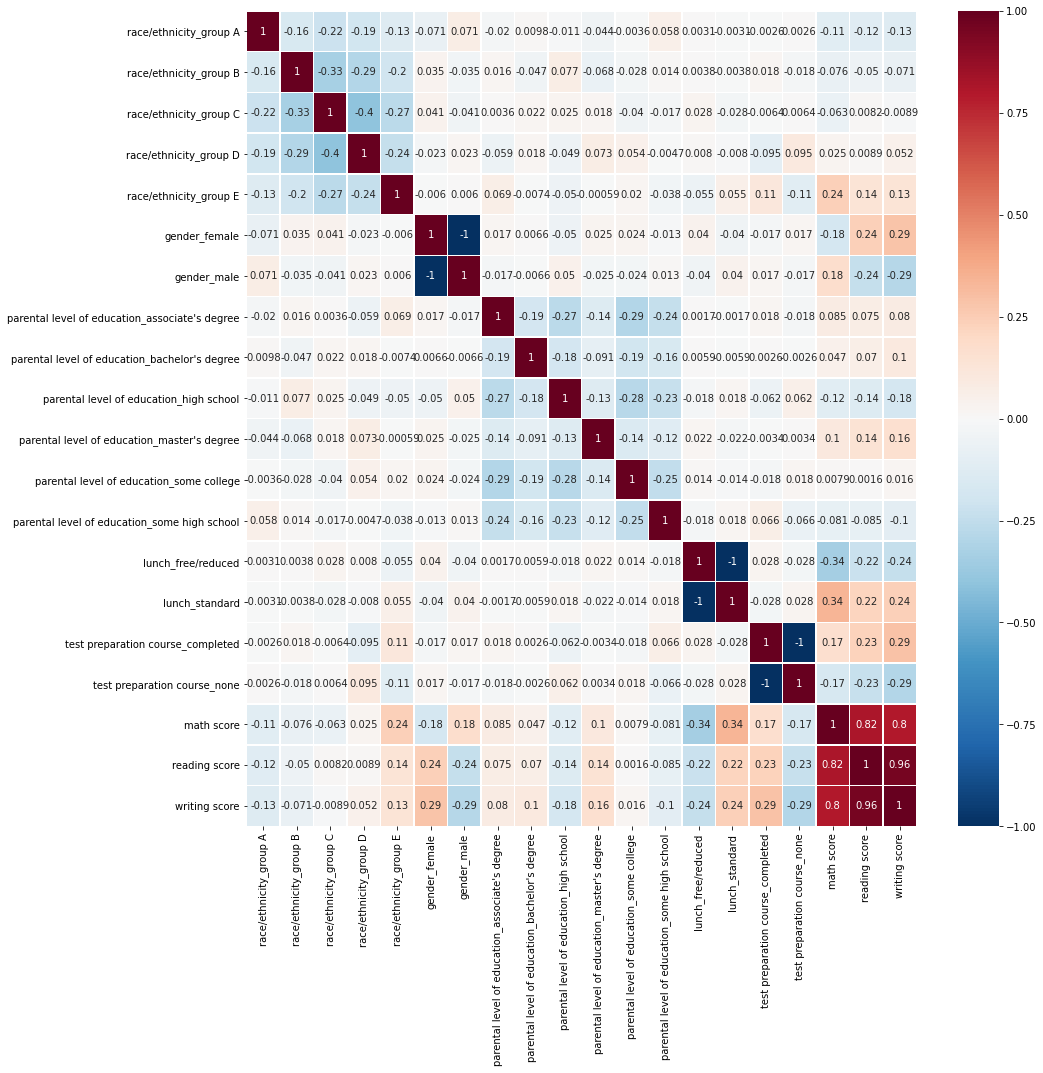

In [69]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sb.heatmap(pearsoncorrtrain, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidths=.5,
            ax=ax
            )

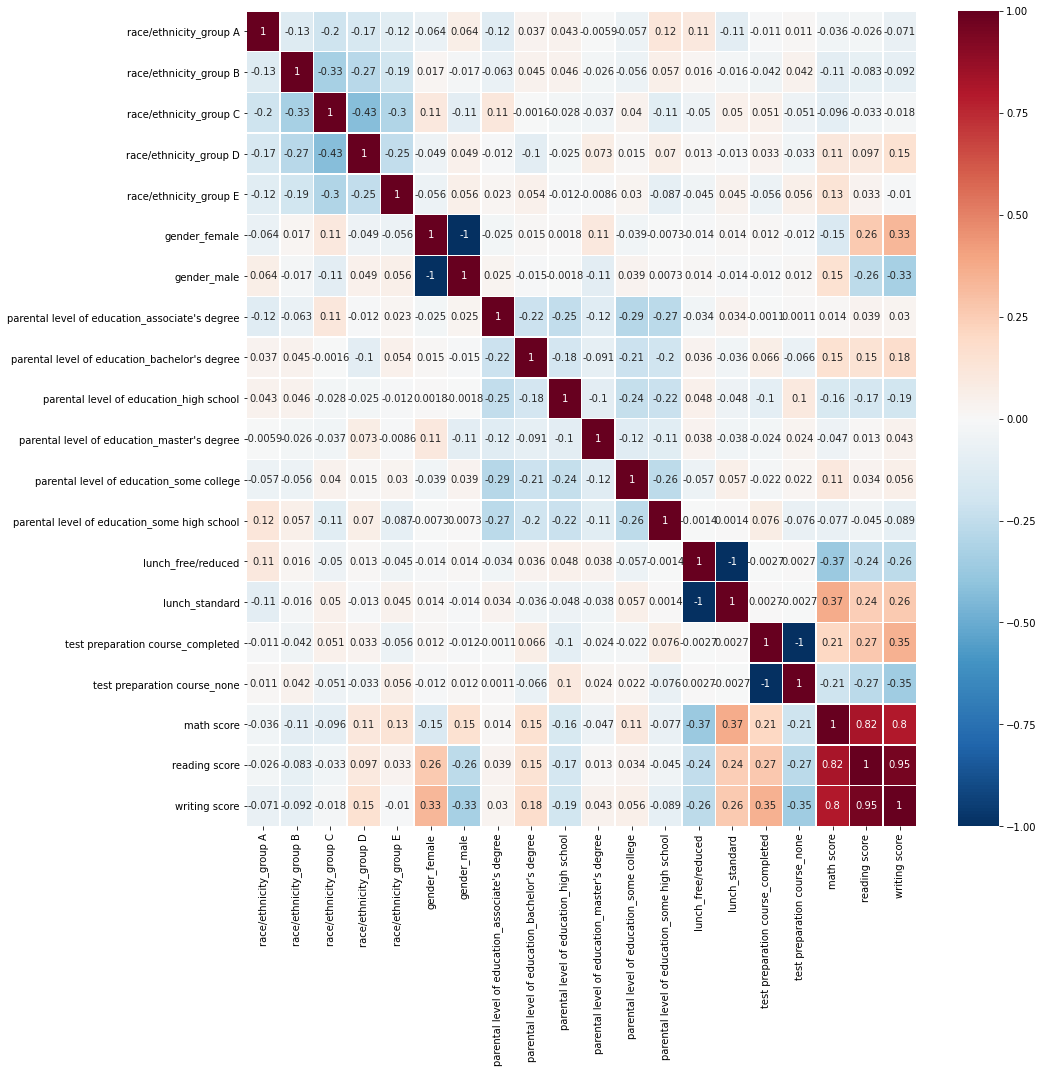

In [70]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sb.heatmap(pearsoncorrtest, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidths=.5,
            ax=ax
            )

###Conlusion Previa

Como podemos notar, la correlacion entre los datos realmente no se altera en un un rango que nos afecte, hay pequeñas variaciones pero de .001 ha .009.

No hay afectacion para el test contra el train